## Sports Analytics Notebook
#### by Trevor Alback started 1/4/2022
#### last update 29/12/2022

In [1]:
# This NBA api is somewhat free, if you sign up, you can get free calls, but not to all data.
# Below is the set-up, just replace the key if you sign up. Below I access a python nba package

# import http.client

# conn = http.client.HTTPSConnection("api-nba-v1.p.rapidapi.com")

# headers = {
#     'X-RapidAPI-Host': "api-nba-v1.p.rapidapi.com",
#     'X-RapidAPI-Key': "a77dba0749mshc84499458a980c3p12cfbcjsn2aee80739e7e"
#     }

# conn.request("GET", "/seasons", headers=headers)

# res = conn.getresponse()
# data = res.read()

# print(data.decode("utf-8"))

In [2]:
## There is an nba_api package which is an api client to get data from nba.com
## https://pypi.org/project/nba-api/

In [3]:
# pip install the package to access the libraries
# pip install nba_api

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import requests
from matplotlib import pyplot as plt

# and the nba_api.stats endpoints
from nba_api.stats import endpoints

In [2]:
# Example data extract below: find league leaders
# Access leagueleaders module through endpoints & assign the class to "data"
data = endpoints.leagueleaders.LeagueLeaders() 

# Create a league leaders data frame (ll_df) using "data" variable and its built in functions
ll_df = data.league_leaders.get_data_frame()

In [3]:
ll_df.head()

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
0,1628369,1,Jayson Tatum,1610612738,BOS,74,2732,727,1559,0.466,...,649,342,78,51,213,160,2225,2209,1.61,0.37
1,203954,2,Joel Embiid,1610612755,PHI,66,2284,728,1328,0.548,...,670,274,66,112,226,205,2183,2369,1.21,0.29
2,1629029,3,Luka Doncic,1610612742,DAL,66,2391,719,1449,0.496,...,569,529,90,33,236,166,2138,2214,2.24,0.38
3,1628983,4,Shai Gilgeous-Alexander,1610612760,OKC,68,2416,704,1381,0.510,...,329,371,112,65,192,192,2135,2073,1.93,0.58
4,203507,5,Giannis Antetokounmpo,1610612749,MIL,63,2024,707,1278,0.553,...,742,359,52,51,246,197,1959,2072,1.46,0.21


In [4]:
print(ll_df.shape)
ll_columns = ll_df.columns
print(ll_columns)

(539, 28)
Index(['PLAYER_ID', 'RANK', 'PLAYER', 'TEAM_ID', 'TEAM', 'GP', 'MIN', 'FGM',
       'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT',
       'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'EFF',
       'AST_TOV', 'STL_TOV'],
      dtype='object')


In [5]:
ll_columns_for_top5 = ['FGM','FGA','FG_PCT','FG3M','FG3A','FG3_PCT','REB','AST','STL','BLK']

In [6]:
# Let's see some top 5 data
for column in ll_columns_for_top5:
    sorted_values = ll_df.sort_values(by=column, ascending=False).head()
    print(f'\nTop 5 {column}\n')
    print(sorted_values[['PLAYER','GP',column]])


Top 5 FGM

                  PLAYER  GP  FGM
1            Joel Embiid  66  728
0           Jayson Tatum  74  727
2            Luka Doncic  66  719
4  Giannis Antetokounmpo  63  707
5        Anthony Edwards  79  707

Top 5 FGA

             PLAYER  GP   FGA
0      Jayson Tatum  74  1559
5   Anthony Edwards  79  1541
2       Luka Doncic  66  1449
6     Julius Randle  77  1432
7  Donovan Mitchell  68  1402

Top 5 FG_PCT

             PLAYER  GP  FG_PCT
524     Braxton Key   3   1.000
532     Chris Silva   1   1.000
398  Udoka Azubuike  36   0.819
513    Tyler Dorsey   3   0.800
364    Jericho Sims  52   0.776

Top 5 FG3M

              PLAYER  GP  FG3M
29     Klay Thompson  69   301
44       Buddy Hield  80   288
20     Stephen Curry  56   273
7   Donovan Mitchell  68   245
10    Damian Lillard  58   244

Top 5 FG3A

            PLAYER  GP  FG3A
29   Klay Thompson  69   731
0     Jayson Tatum  74   686
44     Buddy Hield  80   677
10  Damian Lillard  58   658
92   Malik Beasley  81   658

In [7]:
# would probably be better sorted removing players < x GP
min_GP = 20
greater_20gp_df = ll_df[ll_df['GP'] >= min_GP]
greater_20gp_df.sort_values(by='GP', ascending=True).head()

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV
475,1627853,476,Ryan Arcidiacono,1610612757,POR,20,172,9,37,0.243,...,15,23,5,0,7,17,26,34,3.29,0.71
457,203920,457,Khem Birch,1610612759,SAS,20,162,19,32,0.594,...,25,7,5,5,8,24,43,63,0.88,0.63
303,1627739,304,Kris Dunn,1610612762,UTA,22,568,116,216,0.537,...,100,124,25,10,35,58,290,402,3.54,0.71
435,1629603,436,Mamadi Diakite,1610612739,CLE,22,176,24,50,0.480,...,30,8,4,9,12,26,57,70,0.67,0.33
434,1631217,435,Moussa Diabate,1610612746,LAC,22,195,24,47,0.511,...,50,4,7,8,9,15,59,90,0.44,0.78


In [8]:
#try again for min 20 games played
for column in ll_columns_for_top5:
    sorted_values = greater_20gp_df.sort_values(by=column, ascending=False).head()
    print(f'\nTop 5 {column}\n')
    print(sorted_values[['PLAYER','GP',column]])


Top 5 FGM

                  PLAYER  GP  FGM
1            Joel Embiid  66  728
0           Jayson Tatum  74  727
2            Luka Doncic  66  719
4  Giannis Antetokounmpo  63  707
5        Anthony Edwards  79  707

Top 5 FGA

             PLAYER  GP   FGA
0      Jayson Tatum  74  1559
5   Anthony Edwards  79  1541
2       Luka Doncic  66  1449
6     Julius Randle  77  1432
7  Donovan Mitchell  68  1402

Top 5 FG_PCT

                  PLAYER  GP  FG_PCT
398       Udoka Azubuike  36   0.819
364         Jericho Sims  52   0.776
350       DeAndre Jordan  39   0.765
308  Robert Williams III  35   0.747
226        Dwight Powell  76   0.732

Top 5 FG3M

              PLAYER  GP  FG3M
29     Klay Thompson  69   301
44       Buddy Hield  80   288
20     Stephen Curry  56   273
7   Donovan Mitchell  68   245
10    Damian Lillard  58   244

Top 5 FG3A

            PLAYER  GP  FG3A
29   Klay Thompson  69   731
0     Jayson Tatum  74   686
44     Buddy Hield  80   677
10  Damian Lillard  58   65

In [45]:
#ll_df.info()

In [46]:
## See endpoints
#help(endpoints)

What are we looking for? Let's import player info from static and test some example unique ID's
See bottom of below link for reference on accessing player and team id's
https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb

In [9]:
from nba_api.stats.static import players
nba_players = players.get_players()
nba_players[:3]

[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False}]

In [10]:
# Find a player's unique id by their full name using dictionary comprehension
# Names are case sensitive
# utilise both .format and f string for the text output
KD = [player for player in nba_players if player['full_name'] == 'Kevin Durant'][0]
print('Kevin info: {}'.format(KD))
print('--------')
KD_ID = KD['id']
print(f'Kevin unique ID: {KD_ID}')

Kevin info: {'id': 201142, 'full_name': 'Kevin Durant', 'first_name': 'Kevin', 'last_name': 'Durant', 'is_active': True}
--------
Kevin unique ID: 201142


In [11]:
print('Number of players fetched: {}'.format(len(nba_players)))

Number of players fetched: 4723


In [12]:
# what about active players only?
Actives = [player for player in nba_players if player['is_active'] == True]
print('Number of active players fetched: {}'.format(len(Actives)))
print('------\ne.g.')
Actives[:3]

Number of active players fetched: 587
------
e.g.


[{'id': 1630173,
  'full_name': 'Precious Achiuwa',
  'first_name': 'Precious',
  'last_name': 'Achiuwa',
  'is_active': True},
 {'id': 203500,
  'full_name': 'Steven Adams',
  'first_name': 'Steven',
  'last_name': 'Adams',
  'is_active': True},
 {'id': 1628389,
  'full_name': 'Bam Adebayo',
  'first_name': 'Bam',
  'last_name': 'Adebayo',
  'is_active': True}]

In [13]:
# Example accessing dictionary items matching a condition
d = {"foo": 1, "bar": 2, "baz": 1}
keys_for_1 = [k for k in d if d[k] == 1]
print(keys_for_1)

['foo', 'baz']


How many players have the last name 'Jordan'. How many more 'Jordans' are there on top of Michael Jordan.  
Loop through the list of dictionaries for a last name matching 'Jordan'.

In [14]:
how_many_Jordans = 0
Jordans_info = []
for i in range(len(nba_players)):
    if nba_players[i]['last_name'] == 'Jordan':
        Jordans_info.append(nba_players[i])
        how_many_Jordans += 1
print('There are {} Jordans in this NBA player list'.format(how_many_Jordans))

There are 8 Jordans in this NBA player list


In [15]:
# who are they
for Jordan in range(len(Jordans_info)):
    print(Jordans_info[Jordan]['full_name'])

Adonis Jordan
DeAndre Jordan
Eddie Jordan
Jerome Jordan
Michael Jordan
Reggie Jordan
Thomas Jordan
Walter Jordan


In [16]:
how_many_Jordans = 0
Jordans_info = []
for i in range(len(Actives)):
    if Actives[i]['last_name'] == 'Jordan':
        Jordans_info.append(Actives[i])
        how_many_Jordans += 1
print('{} ACTIVE Jordans in this NBA player list'.format(how_many_Jordans))

1 ACTIVE Jordans in this NBA player list


In [17]:
# who is that?
for Jordan in range(len(Jordans_info)):
    print(Jordans_info[Jordan]['full_name'])

DeAndre Jordan


What about players with the first name 'James'? I knew of James Harden, James Worthy, James Johnson.

In [18]:
how_many_Jameses = 0
James_info = []
for i in range(len(nba_players)):
    if nba_players[i]['first_name'] == 'James':
        James_info.append(nba_players[i])
        how_many_Jameses += 1
print('There are {} players with the first name of James'.format(how_many_Jameses))

There are 31 players with the first name of James


In [19]:
for James in range(len(James_info)):
    print(James_info[James]['full_name'])

James Anderson
James Augustine
James Bailey
James Blackwell
James Bouknight
James Collins
James Cotton
James Davis
James Donaldson
James Edwards
James Ennis III
James Harden
James Hardy
James Johnson
James Jones
James Lang
James Nunnally
James Owens
James Posey
James Robinson
James Scott
James Silas
James Singleton
James Southerland
James Thomas
James Webb III
James White
James Wilkes
James Wiseman
James Worthy
James Young


In [20]:
# let's look at some team Ids
from nba_api.stats.static import teams 
NBA_teams = teams.get_teams()
print('There are {} teams in this list of dictionaries of NBA teams.'.format(len(NBA_teams)))

There are 30 teams in this list of dictionaries of NBA teams.


In [21]:
# Golden State Warriors team id
GSW = [x for x in NBA_teams if x['full_name'] == 'Golden State Warriors'][0]
GSW_ID = GSW['id']
GSW_ID 

1610612744

In [22]:
GSW

{'id': 1610612744,
 'full_name': 'Golden State Warriors',
 'abbreviation': 'GSW',
 'nickname': 'Warriors',
 'city': 'Golden State',
 'state': 'California',
 'year_founded': 1946}

In [23]:
# or there are find methods
team_name_exact = 'Chicago Bulls'
Bulls = teams.find_teams_by_full_name(team_name_exact)
print(Bulls)
Bulls_ID = Bulls[0]['id']
print(Bulls_ID)

[{'id': 1610612741, 'full_name': 'Chicago Bulls', 'abbreviation': 'CHI', 'nickname': 'Bulls', 'city': 'Chicago', 'state': 'Illinois', 'year_founded': 1966}]
1610612741


We want player id and team id so we can extract other data. 
Let's have a look at Kevin Durant and the fan favourite GSW.
From earlier:

In [24]:
print(KD_ID)
print(GSW_ID)

201142
1610612744


In [25]:
from nba_api.stats.endpoints import playercareerstats

In [26]:
# Kevin Durant
KD_career = playercareerstats.PlayerCareerStats(player_id=str(KD_ID))
KD_yby = KD_career.get_data_frames()[0]
KD_yby.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201142,2007-08,00,1610612760,SEA,19.0,80,80,2768.0,587,...,0.873,70,278,348,192,78,75,232,122,1624
1,201142,2008-09,00,1610612760,OKC,20.0,74,74,2885.0,661,...,0.863,77,405,482,205,96,53,225,134,1871
2,201142,2009-10,00,1610612760,OKC,21.0,82,82,3239.0,794,...,0.900,105,518,623,231,112,84,271,171,2472
3,201142,2010-11,00,1610612760,OKC,22.0,78,78,3038.0,711,...,0.880,57,476,533,214,88,76,218,159,2161
4,201142,2011-12,00,1610612760,OKC,23.0,66,66,2546.0,643,...,0.860,40,487,527,231,88,77,248,133,1850


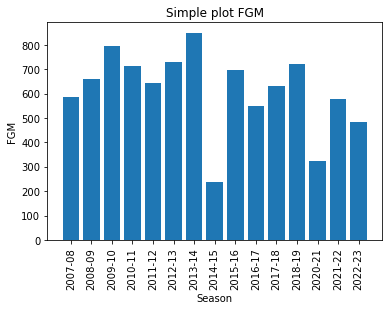

In [27]:
# visualise 
fig, ax = plt.subplots()
ax.bar(KD_yby['SEASON_ID'], KD_yby['FGM'])

ax.set(xlabel='Season', ylabel='FGM',
       title='Simple plot FGM')
plt.xticks(rotation=90)
ax.grid(False)

A quick look at the chart shows 2013-2014 as the current highest count of FGM (field goals made), followed by 2014-2015 as the lowest. 
A quick google shows that Durant won the MVP (most valuable player) in 2013-2014 season and was then injured in the 2014-2015 season (only playing 27 games, leading to lower count of FGM). 
<br><br>Perhaps this is better shown including how many games KD played. Although plots sharing axes can sometimes be difficult to interpret, this shows some interesting overlayed bars with FGM and Games Played.

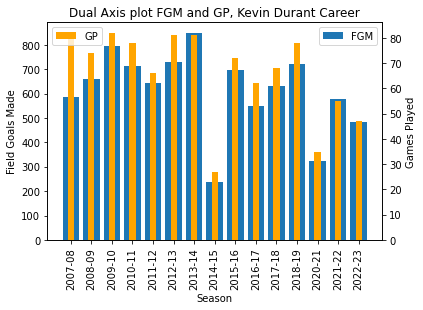

In [28]:
fig, ax = plt.subplots()


width = 0.3

ax.bar(KD_yby['SEASON_ID'], KD_yby['FGM'], label='FGM')
ax.set(xlabel='Season', ylabel='Field Goals Made',
       title='Dual Axis plot FGM and GP, Kevin Durant Career')
plt.xticks(rotation=90)
ax.grid(False)

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.bar(KD_yby['SEASON_ID'], KD_yby['GP'],color='orange', label = 'GP', width = width)
ax2.set_ylabel("Games Played")

ax.legend(loc = 'upper right')
ax2.legend(loc = 'upper left')

plt.show()

A few things make sense. In his first season, he played a lot of games but took less shots, expected of a rookie/younger player new into the NBA. Even so, he won rookie of the year (best new player in their first season). His shot taking generally increased in the early years, while the number of games remained relatively similar until MVP in 2013-2014 (a dip in 11/12 with slightly less GP/FGM). Perhaps playing a high number of games in a season is a key consideration for MVP candidates. Season 14/15 and 20/21 show much fewer GP and FGM due to injury. Overall, KD has played less games in his later years compared to his early years in the NBA. He's also missed games in 2021-2022, 2022-2023 seasons due to injury again. He won't be in contention for 2022/23 MVP award. It will be interesting to monitor his GP in the coming years to see if that goes go back up and impacts his rankings/team win success.  

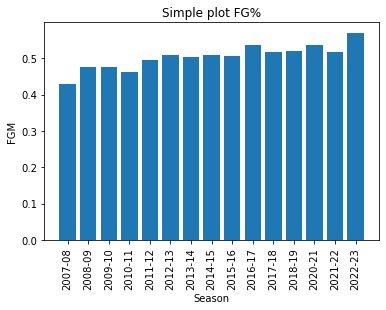

In [29]:
fig, ax = plt.subplots()
ax.bar(KD_yby['SEASON_ID'], KD_yby['FG_PCT'])

ax.set(xlabel='Season', ylabel='FGM',
       title='Simple plot FG%')
plt.xticks(rotation=90)
ax.grid(False)

Impressivley, KD's FG% (field goal percentage) shows an increasing trend season on season. Perhaps these are better shown in a line chart over time. Note that the current season 22-23, KD has his highest FG% ever.

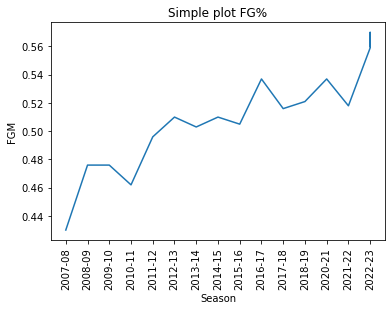

In [30]:
fig, ax = plt.subplots()
ax.plot(KD_yby['SEASON_ID'], KD_yby['FG_PCT'])

ax.set(xlabel='Season', ylabel='FGM',
       title='Simple plot FG%')
plt.xticks(rotation=90)
ax.grid(False)

In [31]:
KD_yby.head()

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,201142,2007-08,00,1610612760,SEA,19.0,80,80,2768.0,587,...,0.873,70,278,348,192,78,75,232,122,1624
1,201142,2008-09,00,1610612760,OKC,20.0,74,74,2885.0,661,...,0.863,77,405,482,205,96,53,225,134,1871
2,201142,2009-10,00,1610612760,OKC,21.0,82,82,3239.0,794,...,0.900,105,518,623,231,112,84,271,171,2472
3,201142,2010-11,00,1610612760,OKC,22.0,78,78,3038.0,711,...,0.880,57,476,533,214,88,76,218,159,2161
4,201142,2011-12,00,1610612760,OKC,23.0,66,66,2546.0,643,...,0.860,40,487,527,231,88,77,248,133,1850


In [32]:
KD_yby.TEAM_ABBREVIATION.unique()

array(['SEA', 'OKC', 'GSW', 'BKN', 'PHX', 'TOT'], dtype=object)

In [33]:
# return some grouped stats by team
# if you don't reset_index() (or as_index=False within groupby) then the plots below don't work as groups become the index
# here the groups are Team_Abbreviation. We want to easily select this against grouped metric
KD_team_stats = KD_yby.groupby(['TEAM_ABBREVIATION'])[['GP','GS','MIN','FGM','FGA','FG_PCT']].mean().reset_index()
print(KD_team_stats)

  TEAM_ABBREVIATION         GP         GS          MIN         FGM  \
0               BKN  43.000000  42.000000  1535.666667  437.333333   
1               GSW  69.333333  69.333333  2365.666667  634.000000   
2               OKC  70.125000  70.125000  2680.000000  665.625000   
3               PHX   8.000000   8.000000   269.000000   73.000000   
4               SEA  80.000000  80.000000  2768.000000  587.000000   
5               TOT  47.000000  47.000000  1672.000000  483.000000   

           FGA    FG_PCT  
0   817.333333  0.538000  
1  1210.333333  0.524667  
2  1357.750000  0.492250  
3   128.000000  0.570000  
4  1366.000000  0.430000  
5   862.000000  0.560000  


<BarContainer object of 6 artists>

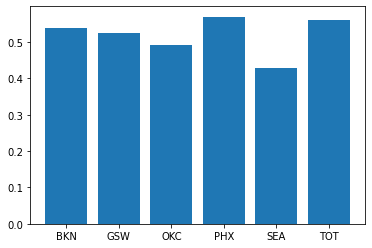

In [34]:
# simple matplotlib bar plot selecting x and y axis values of interest
plt.bar(KD_team_stats['TEAM_ABBREVIATION'],KD_team_stats['FG_PCT'])

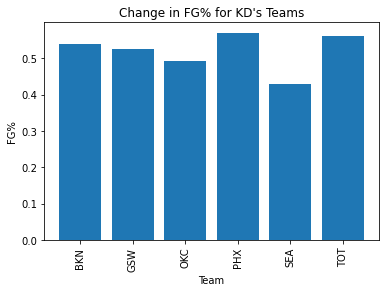

In [35]:
# or here a bit more detailed and add some labels and title, further visual edits possible here
# Plot change in AVG's for the different teams that KD played for
fig, ax = plt.subplots()
ax.bar(KD_team_stats['TEAM_ABBREVIATION'], KD_team_stats['FG_PCT'])

ax.set(xlabel='Team', ylabel='FG%',
       title="Change in FG% for KD's Teams")
plt.xticks(rotation=90)
ax.grid(False)

Above chart shows KD's average FG_PCT is highest with Pheonix (trade BKN to PHX in 2023 and therefore fewer games played in PHX). He's improved on FG% team by team over time (this chart not ordered by year that he played in that team).

In [36]:
KD_team_stats

,TEAM_ABBREVIATION,GP,GS,MIN,FGM,FGA,FG_PCT
0,BKN,43.000000,42.000000,1535.666667,437.333333,817.333333,0.538000
1,GSW,69.333333,69.333333,2365.666667,634.000000,1210.333333,0.524667
2,OKC,70.125000,70.125000,2680.000000,665.625000,1357.750000,0.492250
3,PHX,8.000000,8.000000,269.000000,73.000000,128.000000,0.570000
4,SEA,80.000000,80.000000,2768.000000,587.000000,1366.000000,0.430000
5,TOT,47.000000,47.000000,1672.000000,483.000000,862.000000,0.560000


OK, now let's try and build a shot map if that data exists through the api 

I managed to build out some nice shot charts, but as of the end of 2023 season, I've had trouble connecting to the nba api app to pull shot location data. I'm guessing it's due to blocking or reaching api call limit from the nba stats. 
I've left the bottom cell output to show the vis that would come automatically if simply running the notebook when the api works. Rerunning the workbook may error at this point. 
To investigate later! I've saved a hardcopy PDF of this to show.

In [37]:
# shot chart detail data not pulling from api. Example below.
# this might be due to too many api calls. 
# reference nba website https://www.nba.com/game/den-vs-phx-0042200223/game-charts
from nba_api.stats.static import players
from nba_api.stats.static import teams
from nba_api.stats.endpoints import shotchartdetail

player_name = 'Kevin Durant'
team_name = 'Phoenix Suns'
game_id = '0042200223'# this is game 3 finals against Denver, where the Suns won, see website above

player = players.find_players_by_full_name(player_name)[0]
team = teams.find_teams_by_full_name(team_name)[0]
print(player['id'])
print(team['id'])
shotchartlist = shotchartdetail.ShotChartDetail(team_id=team['id'],player_id=player['id'], game_id_nullable=game_id)
games = shotchartlist.get_data_frames()[0]
games.head()

201142
1610612756


,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM


Above returns an empty dataframe. So I went to a new website to get a hardcopy of some shot data to build out an example shot chart.https://www.nbasavant.com/shot_search.
I searched Kevin Durant, in the 2017 season for all jump shots.
Skip to end of the notebook to see this treated. 
I've kept other cell outputs available to see. 

In [38]:
# try new method using a downloaded file
# https://www.nbasavant.com/shot_search
# use this website, search Kevin Durant and All jump shots, download the csv and save locally
data = pd.read_csv('nba_savant201142.csv')
data.head()

,name,team_name,game_date,season,espn_player_id,team_id,espn_game_id,period,minutes_remaining,seconds_remaining,...,shot_type,shot_distance,opponent,x,y,dribbles,touch_time,defender_name,defender_distance,shot_clock
0,Kevin Durant,Golden State Warriors,2017-10-23,2017,3202,1610612744,400974796,3,8,0,...,2PT Field Goal,3,Dallas Mavericks,22,31,0,0.0,NaN,0.0,0.0
1,Kevin Durant,Golden State Warriors,2017-10-17,2017,3202,1610612744,400974438,3,5,14,...,2PT Field Goal,9,Houston Rockets,88,41,0,0.0,NaN,0.0,0.0
2,Kevin Durant,Golden State Warriors,2018-04-01,2017,3202,1610612744,400975899,1,1,17,...,2PT Field Goal,8,Phoenix Suns,-57,67,0,0.0,NaN,0.0,0.0
3,Kevin Durant,Golden State Warriors,2018-01-20,2017,3202,1610612744,400975425,1,8,45,...,2PT Field Goal,8,Houston Rockets,-53,61,0,0.0,NaN,0.0,0.0
4,Kevin Durant,Golden State Warriors,2017-10-29,2017,3202,1610612744,400974842,3,8,30,...,2PT Field Goal,7,Detroit Pistons,-38,64,0,0.0,NaN,0.0,0.0


In [65]:
##from nba_api.stats.endpoints import shotchartdetail

In [39]:
# Phoenix team id
PHX = [x for x in NBA_teams if x['full_name'] == 'Phoenix Suns'][0]
PHX_ID = PHX['id']
PHX_ID

1610612756

In [40]:
# doesn't appear to be grabbing shot detail data now
KD_shots_PHX = shotchartdetail.ShotChartDetail(player_id=str(KD_ID),team_id=str(PHX_ID))
KD_shots_PHX.get_data_frames()[0]

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM


In [63]:
# let's see first data frame within shotchartdetail
KD_shots_PHX = shotchartdetail.ShotChartDetail(player_id=str(KD_ID),team_id=str(PHX_ID),season_type_all_star = ['Regular Season', 'Playoffs'])
KD_shots_PHX_DF = KD_shots_PHX.get_data_frames()[0]
KD_shots_PHX_DF.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM


We see a LOC_X and LOX_Y field as well as some other shot descriptors (e.g. shot_made_flag, HTM,VTM etc)

In [74]:
# Let's see the second data frame, not 100% sure what this is showing
KD_shots_PHX_DF1 = KD_shots_PHX.get_data_frames()[1]
KD_shots_PHX_DF1.head(5)

,GRID_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,FGA,FGM,FG_PCT


In [41]:
# Kevin Durant, using GSW_ID (the ID for Golden State Warriors)
# KD_shots = shotchartdetail.ShotChartDetail(player_id=str(KD_ID),team_id=str(GSW_ID))
# KD_shots_yby = KD_shots.get_data_frames()[0]
# KD_shots_yby.head()

In [76]:
# let's treat the ShotChartDetail to extract data (2022-23 season etc)
# taken from https://stackoverflow.com/questions/65627725/how-to-get-nba-shot-chart-data-correctly

import json

response = shotchartdetail.ShotChartDetail(
    team_id=0,
    player_id=0,
    season_nullable='2022-23',
    context_measure_simple = 'FGA', # I think the default is for made shots only, so set this explicitly to FGA 
    season_type_all_star='Regular Season'
)

content = json.loads(response.get_json())

results = content['resultSets'][0]
headers = results['headers']
rows = results['rowSet']
df = pd.DataFrame(rows, columns=headers)
#df.columns = headers

# write to csv file
#df.to_csv(r'C:\Users\Comp\Desktop\nba_2001-02.csv', index=False)

ReadTimeout: HTTPSConnectionPool(host='stats.nba.com', port=443): Read timed out. (read timeout=30)

In [77]:
df.head()

NameError: name 'df' is not defined

In [44]:
df.shape

(217220, 24)

In [45]:
# player filter let's try KD
Player = 'Kevin Durant'
KD_SHOTS = df[df['PLAYER_NAME'] == Player]
KD_SHOTS.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
914,Shot Chart Detail,0022200006,13,201142,Kevin Durant,1610612751,Brooklyn Nets,1,11,15,...,Center(C),24+ ft.,24,13,248,1,0,20221019,BKN,NOP
920,Shot Chart Detail,0022200006,32,201142,Kevin Durant,1610612751,Brooklyn Nets,1,9,32,...,Center(C),16-24 ft.,18,55,172,1,0,20221019,BKN,NOP
937,Shot Chart Detail,0022200006,95,201142,Kevin Durant,1610612751,Brooklyn Nets,1,4,54,...,Right Side(R),8-16 ft.,15,89,126,1,0,20221019,BKN,NOP
940,Shot Chart Detail,0022200006,109,201142,Kevin Durant,1610612751,Brooklyn Nets,1,4,8,...,Center(C),Less Than 8 ft.,3,25,19,1,1,20221019,BKN,NOP
942,Shot Chart Detail,0022200006,115,201142,Kevin Durant,1610612751,Brooklyn Nets,1,3,40,...,Right Side Center(RC),16-24 ft.,20,81,183,1,1,20221019,BKN,NOP


In [46]:
# what is the average made shot percentage 
# divide the sum of the shot_made_flag column by the total rows of the dataset (or sum of show_attempted_flag)
print('Total:')
TOTAL_SHOTS = df.shape[0]
MADE_SHOTS = df.SHOT_MADE_FLAG.sum()
print('NBA players took {} total shots and made {} at a % of:'.format(TOTAL_SHOTS,MADE_SHOTS))
print(df.SHOT_MADE_FLAG.sum() / df.shape[0])

print('---- \nKevin Durant:')
KD_TOTAL_SHOTS = KD_SHOTS.shape[0]
KD_MADE_SHOTS = KD_SHOTS.SHOT_MADE_FLAG.sum()
print('KD took {} total shots and made {} at a % of:'.format(KD_TOTAL_SHOTS,KD_MADE_SHOTS))
print(KD_SHOTS.SHOT_MADE_FLAG.sum() / KD_SHOTS.shape[0])
#print(KD_SHOTS.SHOT_MADE_FLAG.sum() / KD_SHOTS.SHOT_ATTEMPTED_FLAG.sum()) using the SUM of shot_attempted_flag as denom


Total:
NBA players took 217220 total shots and made 103260 at a % of:
0.4753705920265169
---- 
Kevin Durant:
KD took 862 total shots and made 483 at a % of:
0.5603248259860789


All players TOTAL shot chart


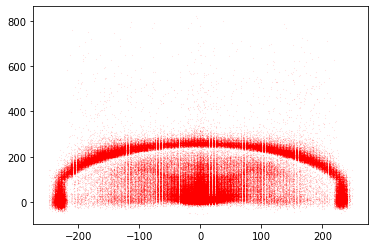

In [47]:
# below idea taken from sports analytics Foundational course on Coursera 
# shot scatter plot on all shot locations
print('All players TOTAL shot chart')
x = df['LOC_X']
y = df['LOC_Y']
plt.scatter(x,y, s=.005,c='r', marker= '.')

Kevin Durant TOTAL Shot Chart


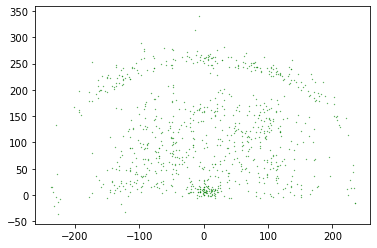

In [48]:
print('Kevin Durant TOTAL Shot Chart')
x1 = KD_SHOTS['LOC_X']
y1 = KD_SHOTS['LOC_Y']
plt.scatter(x1,y1, s=.3,c='g', marker= '.')

In [49]:
KD_MADE = KD_SHOTS[KD_SHOTS['SHOT_MADE_FLAG'] > 0] # 1 is a make, so anything greater than 0
KD_MISSED = KD_SHOTS[KD_SHOTS['SHOT_MADE_FLAG'] < 1] # 0 is a miss so anything less than 1

In [50]:
KD_MADE.shape

(483, 24)

In [51]:
KD_MISSED.shape

(379, 24)

Kevin Durant MADE Shot Chart


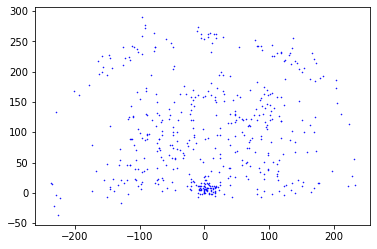

In [52]:
print('Kevin Durant MADE Shot Chart')
x_made = KD_MADE['LOC_X']
y_made = KD_MADE['LOC_Y']
plt.scatter(x_made,y_made, s=.3,c='b', marker= 'o')

Kevin Durant MISSED Shot Chart


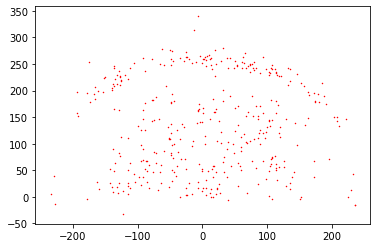

In [53]:
print('Kevin Durant MISSED Shot Chart')
x_miss = KD_MISSED['LOC_X']
y_miss = KD_MISSED['LOC_Y']
plt.scatter(x_miss,y_miss, s=.3,c='r', marker= 'x')

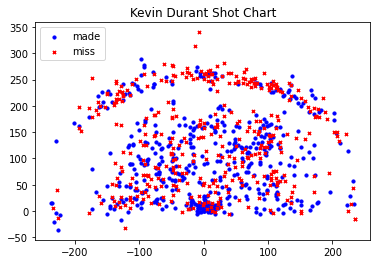

In [54]:
##import matplotlib.pyplot as plt

# plot make and miss on the same plot

x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_made, y_made, s=10, c='b', marker="o", label='made')
ax1.scatter(x_miss, y_miss, s=10, c='r', marker="x", label='miss')
plt.legend(loc='upper left')
plt.title('Kevin Durant Shot Chart')
plt.show()

In [55]:
print('min game date: ' + KD_SHOTS['GAME_DATE'].min())
print('max game date: ' + KD_SHOTS['GAME_DATE'].max())

min game date: 20221019
max game date: 20230406


An idea is to compare make/miss shot charts across different player positions? I imagine Centre positions from 5 years ago to today (perhaps across all positions) have significantly more three pointers attempted and made. 

An example of drawing a half court for overlay is below from some different sources.

In [41]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [42]:
# from https://towardsdatascience.com/make-a-simple-nba-shot-chart-with-python-e5d70db45d0d
# how to plot with an NBA court, need to check how to get shots to plot on top of this

def create_court(ax, color):
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)


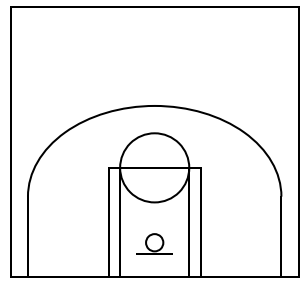

In [43]:
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'black')
plt.show()

Or below from: https://github.com/bradleyfay/py-Goldsberry/blob/master/docs/Visualizing%20NBA%20Shots%20with%20py-Goldsberry.ipynb
linked at: https://medium.com/@fastbreakstatistics/creating-the-nba-shotchart-using-python-5c595374d905

In [44]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

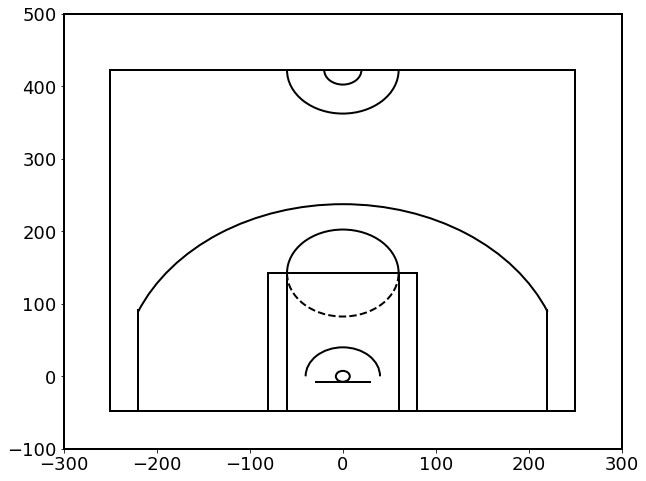

In [47]:
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(10,8))
draw_court(outer_lines=True, color="black")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

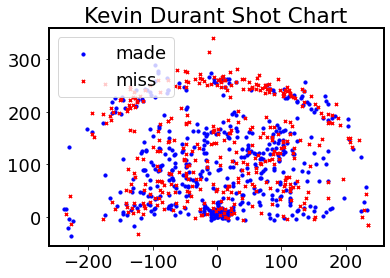

In [61]:
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_made, y_made, s=10, c='b', marker="o", label='made')
ax1.scatter(x_miss, y_miss, s=10, c='r', marker="x", label='miss')
plt.legend(loc='upper left')
plt.title('Kevin Durant Shot Chart')
plt.show()

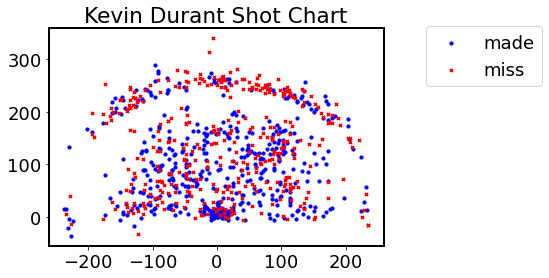

In [62]:
#put legend outside the chart
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_made, y_made, s=10, c='b', marker="o", label='made')
ax1.scatter(x_miss, y_miss, s=10, c='r', marker="x", label='miss')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Kevin Durant Shot Chart')
plt.show()

KD's total shots overlaid on a halfcourt drawing below. Credit/reference above for drawn half court. 

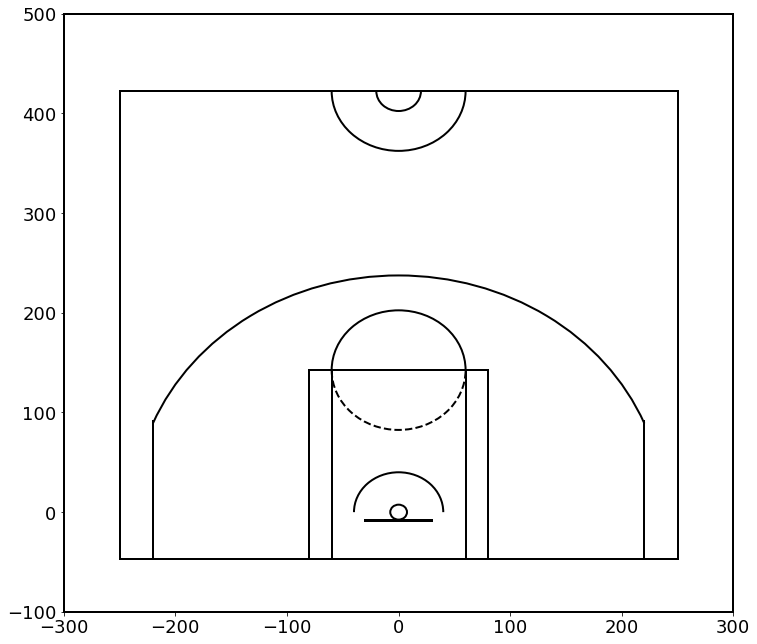

In [49]:
#Blank court
mpl.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(12,11))
draw_court(outer_lines=True, color="black")
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

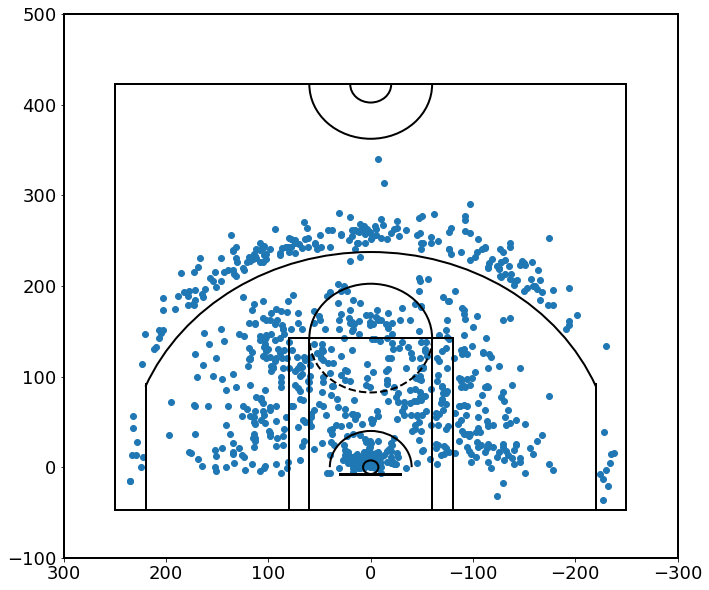

In [64]:
plt.figure(figsize=(11,10))
plt.scatter(KD_SHOTS.LOC_X, KD_SHOTS.LOC_Y)
draw_court(outer_lines=True)
# Descending values along the axis from left to right
plt.xlim(300,-300)
plt.ylim(-100,500)
plt.show()

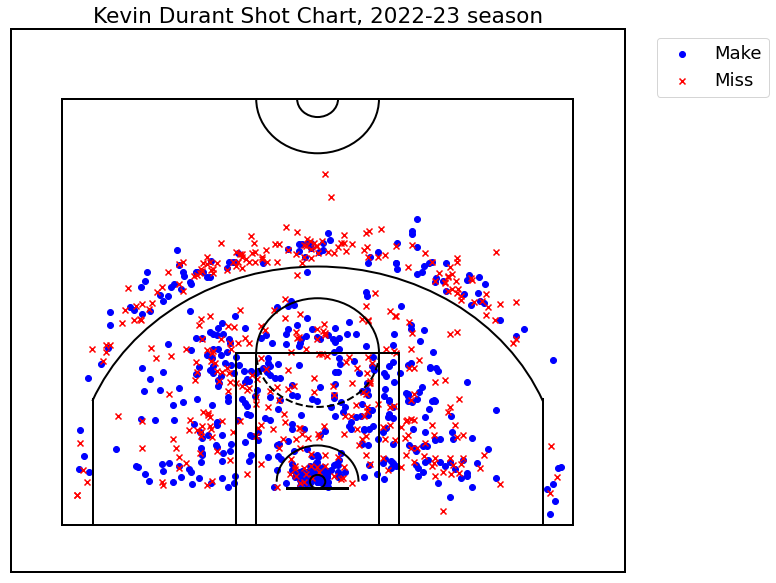

In [65]:
plt.figure(figsize=(11,10)) # adjust figure size
plt.scatter(x_made, y_made, c='b',marker='o',label='Make') # plot made shots with blue circle dot
plt.scatter(x_miss, y_miss, c='r',marker='x',label='Miss') # plot missed shots with red x
draw_court(outer_lines=True) # draw the court from function above
plt.legend(bbox_to_anchor=(1.25, 1.0)) #adjust tuple to move legend
plt.title('Kevin Durant Shot Chart, 2022-23 season') #title
plt.xlim(300,-300) #edit xlim
plt.ylim(-100,500) #edit ylim
plt.xticks([]) #remove x ticks
plt.yticks([]) #remove y ticks
plt.show()

Perhaps look into scraping NBA player photos: below links to a webcrawler from nba.com
https://github.com/elhanarinc/nbaphotocrawler

Start with just using a downloaded image of KD. Option is to better present this, perhaps next to the plot

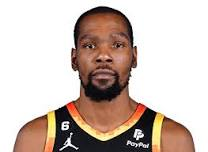

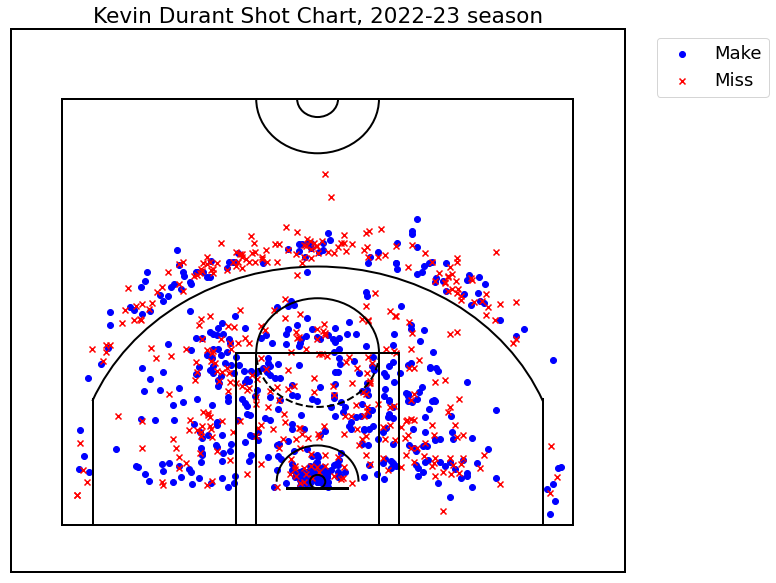

In [66]:
# display image
from IPython.display import Image
display(Image(filename='Kevin_Durant_Image.jpg'))

# display plot
plt.figure(figsize=(11,10)) # adjust figure size
plt.scatter(x_made, y_made, c='b',marker='o',label='Make') # plot made shots with blue circle dot
plt.scatter(x_miss, y_miss, c='r',marker='x',label='Miss') # plot missed shots with red x
draw_court(outer_lines=True) # draw the court from function above
plt.legend(bbox_to_anchor=(1.25, 1.0)) #adjust tuple to move legend
plt.title('Kevin Durant Shot Chart, 2022-23 season') #title
plt.xlim(300,-300) #edit xlim
plt.ylim(-100,500) #edit ylim
plt.xticks([]) #remove x ticks
plt.yticks([]) #remove y ticks
plt.show()

Further work could be to look at options to better display this, and obviously allow to search for other players, teams, games, etc. This gives an example though of how an api can be used to do some player and sports analytics. 

If you got this far, thanks for reading! Credit to the links above for a few of the funcions and accessing parts of the nba_api stats.

My api calls are not working for some reason. Try using downloaded csv file and get same data.
https://www.nbasavant.com/shot_search use this website, search Kevin Durant, All jump shots, 2017 season, and download the csv and save locally.
Redo above steps, but this time with a raw .csv dataset. 

In [50]:
KD_CSV_SHOTS = pd.read_csv('nba_savant201142.csv')
print(KD_CSV_SHOTS.columns)
KD_CSV_SHOTS.head()

Index(['name', 'team_name', 'game_date', 'season', 'espn_player_id', 'team_id',
       'espn_game_id', 'period', 'minutes_remaining', 'seconds_remaining',
       'shot_made_flag', 'action_type', 'shot_type', 'shot_distance',
       'opponent', 'x', 'y', 'dribbles', 'touch_time', 'defender_name',
       'defender_distance', 'shot_clock'],
      dtype='object')


,name,team_name,game_date,season,espn_player_id,team_id,espn_game_id,period,minutes_remaining,seconds_remaining,...,shot_type,shot_distance,opponent,x,y,dribbles,touch_time,defender_name,defender_distance,shot_clock
0,Kevin Durant,Golden State Warriors,2017-10-23,2017,3202,1610612744,400974796,3,8,0,...,2PT Field Goal,3,Dallas Mavericks,22,31,0,0.0,NaN,0.0,0.0
1,Kevin Durant,Golden State Warriors,2017-10-17,2017,3202,1610612744,400974438,3,5,14,...,2PT Field Goal,9,Houston Rockets,88,41,0,0.0,NaN,0.0,0.0
2,Kevin Durant,Golden State Warriors,2018-04-01,2017,3202,1610612744,400975899,1,1,17,...,2PT Field Goal,8,Phoenix Suns,-57,67,0,0.0,NaN,0.0,0.0
3,Kevin Durant,Golden State Warriors,2018-01-20,2017,3202,1610612744,400975425,1,8,45,...,2PT Field Goal,8,Houston Rockets,-53,61,0,0.0,NaN,0.0,0.0
4,Kevin Durant,Golden State Warriors,2017-10-29,2017,3202,1610612744,400974842,3,8,30,...,2PT Field Goal,7,Detroit Pistons,-38,64,0,0.0,NaN,0.0,0.0


All players TOTAL shot chart


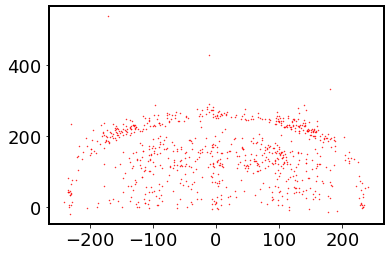

In [51]:
print('All players TOTAL shot chart')
x1 = KD_CSV_SHOTS['x']
y1 = KD_CSV_SHOTS['y']
plt.scatter(x1,y1, s=.8,c='r', marker= '.')

In [52]:
KD_CSV_MADE = KD_CSV_SHOTS[KD_CSV_SHOTS['shot_made_flag'] > 0] # 1 is a make, so anything greater than 0
KD_CSV_MISSED = KD_CSV_SHOTS[KD_CSV_SHOTS['shot_made_flag'] < 1] # 0 is a miss so anything less than 1

Kevin Durant MADE Shot Chart


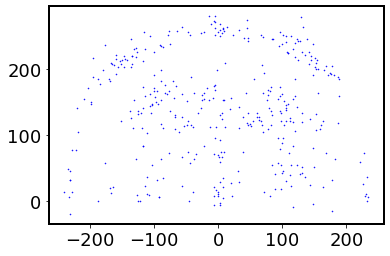

In [53]:
print('Kevin Durant MADE Shot Chart')
x_made = KD_CSV_MADE['x']
y_made = KD_CSV_MADE['y']
plt.scatter(x_made,y_made, s=.3,c='b', marker= 'o')

Kevin Durant MISS Shot Chart


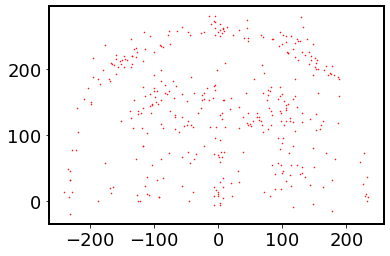

In [54]:
print('Kevin Durant MISS Shot Chart')
x_miss = KD_CSV_MISSED['x']
y_miss = KD_CSV_MISSED['y']
plt.scatter(x_made,y_made, s=.3,c='r', marker= 'o')

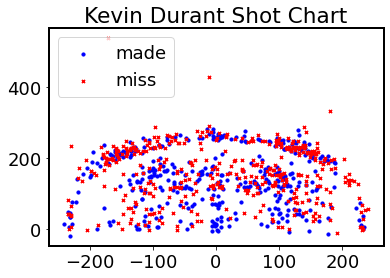

In [55]:
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x_made, y_made, s=10, c='b', marker="o", label='made')
ax1.scatter(x_miss, y_miss, s=10, c='r', marker="x", label='miss')
plt.legend(loc='upper left')
plt.title('Kevin Durant Shot Chart')
plt.show()

In [56]:
from matplotlib.patches import Circle, Rectangle, Arc

def draw_court(ax=None, color='black', lw=2, outer_lines=False):
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, -1, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-220, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((220, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22, theta2=158, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

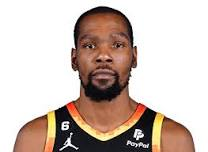

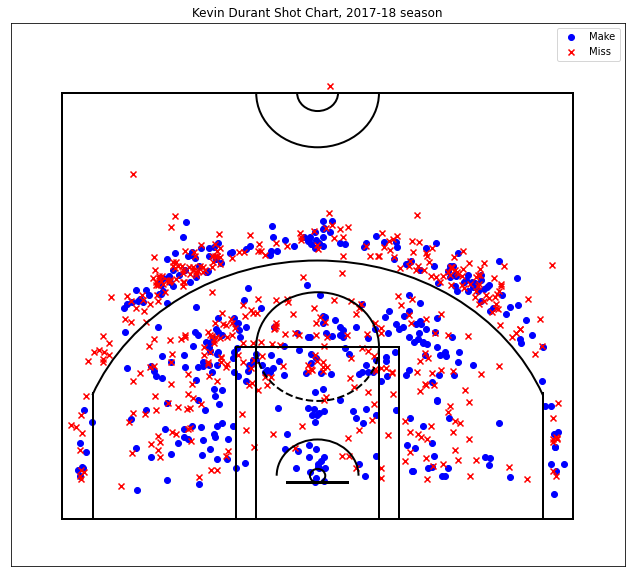

In [118]:
# display image
from IPython.display import Image
display(Image(filename='Kevin_Durant_Image.jpg'))

# display plot
plt.figure(figsize=(11,10)) # adjust figure size
plt.scatter(x_made, y_made, c='b',marker='o',label='Make') # plot made shots with blue circle dot
plt.scatter(x_miss, y_miss, c='r',marker='x',label='Miss') # plot missed shots with red x
draw_court(outer_lines=True) # draw the court from function above
plt.legend(bbox_to_anchor=(1.0, 1.0)) #adjust tuple to move legend
plt.title('Kevin Durant Shot Chart, 2017-18 season') #title
plt.xlim(300,-300) #edit xlim
plt.ylim(-100,500) #edit ylim
plt.xticks([]) #remove x ticks
plt.yticks([]) #remove y ticks
plt.show()

In [119]:
#pip install streamlit

# Investigate Streamlit for displaying plot 

# https://alanjones2.github.io/streamlitfromscratch/?utm_source=substack&utm_medium=email

# import streamlit as st

In [ ]:
# also investigate plotly for more visually appealing vizzes
# perhaps investigate trying to apply a basic web view for visualising a few players stats
# eg web app using mercury?
# https://github.com/mljar/mercury